In [ ]:
# Trong thuật toán K-means, mỗi cụm dữ liệu được đặc trưng bởi một tâm (centroid).
# Tâm là điểm đại diện nhất cho mỗi cụm và có giá trị bằng trung bình của trung bình của toàn bộ dữ liệu quan sát nằm trong cụm.
# Dựa vào khoảng cách của mỗi quan sát tới các tâm để xác định nhãn nhãn cho chúng trùng thuộc về tâm gần nhất.
# Ban đầu, thuật toán sẽ khời tạo ngẫu nhiên một số lượng xác định các tâm cụm. 
# Sau đó tiến hành xác định nhãn cho từng điểm dữ liệu và tiếp tục cập nhật lại tâm cụm.
# Thuật toán sẽ dùng lại cho tới khi toàn bộ các điểm dữ liệu được phân về đúng cụm hoặc số lần cập nhật tâm chạm ngưỡng.

In [1]:
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

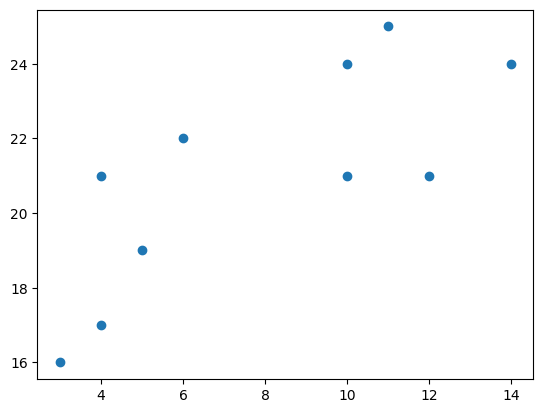

In [2]:
# Chuẩn bị dữ liệu mẫu
x=[4,5,10,4,3,11,14,6,10,12]
y=[21,19,24,17,16,25,24,22,21,21]
# Biểu diễn nó lên biểu đồ phân tán
plt.scatter(x,y)
plt.show()

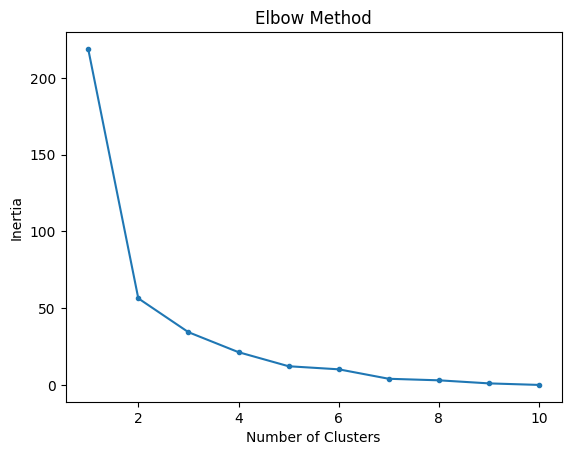

In [3]:
# Áp dụng phương pháp Elbow tìm ra giá trị cụm tối ưu
from sklearn.cluster import KMeans
# Tạo danh sách 2 chiều (x,y)
data=list(zip(x,y))
# Tạo danh sách lưu trữ độ quán tính cho từng cụm K
inertias= []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11),inertias,marker='.')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

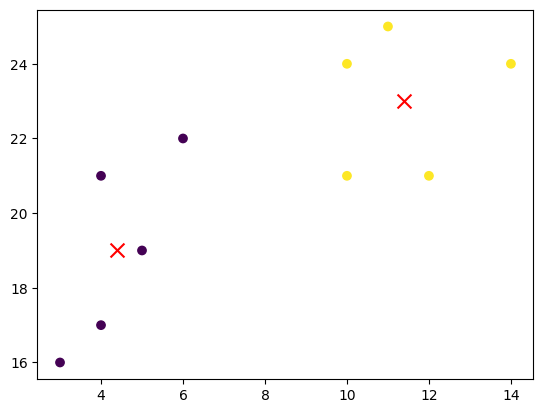

In [24]:
# Sau khi chọn được k tối ưu, ta thực hiện trực quan hóa dữ liệu để phân cụm
# Ở đây ta chọn K=2
kmeans = KMeans(n_clusters=2)
# Thực hiện huấn luyện mô hình
kmeans.fit(data)
# Gán nhãn (label) cho từng điểm dữ liệu, xác định điểm dữ liệu thuộc cụm nào \\ c=kmeans.labels_ \\
plt.scatter(x,y,c=kmeans.labels_)
# Hiển thị tâm cụm khi thuật toán hội tụ
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',marker ='x' )
plt.show()

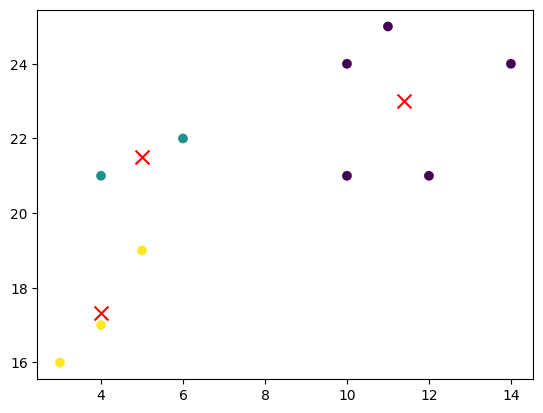

In [38]:
# Thực hiện phân cụm với số cụm là 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
plt.scatter(x,y,c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',marker ='x' )
plt.show()

In [35]:
# Số lần test
num_tests = 10
results = []
# Chạy k-Means 10 lần với số cụm là 3
for _ in range(num_tests):
    kmeans = KMeans(n_clusters=3, n_init=10, random_state=None)
    kmeans.fit(data)
    results.append(Counter(kmeans.labels_))
# Tóm tắt số lượng điểm trong mỗi cụm qua các lần chạy
summary = {}
for test_result in results:
    for cluster, count in test_result.items():
        if cluster not in summary:
            summary[cluster] = []
        summary[cluster].append(count)
# In kết quả
for cluster, counts in summary.items():
    print(f"Cụm {cluster}: {counts}")

Cụm 2: [3, 2, 2, 3, 2, 3, 3, 2, 2, 2]
Cụm 1: [5, 5, 3, 5, 5, 2, 2, 3, 5, 5]
Cụm 0: [2, 3, 5, 2, 3, 5, 5, 5, 3, 3]
